In [1]:
import sys
import os
path_to_top_dir = "../"
# Dynamically add the `project` directory to the path
sys.path.append(os.path.abspath(path_to_top_dir))

In [2]:
# Utils
import warnings

# Plotting
from rdkit.Chem.Draw import MolsToGridImage
import matplotlib.pyplot as plt
import seaborn as sns
from pycirclize import Circos

# File management
import json
import numpy as np
import pandas as pd


# GFlowNET
import gflownet
from gflownet.algo.trajectory_balance import TrajectoryBalance
from gflownet.envs.graph_building_env import GraphBuildingEnv
from gflownet.config import init_empty, Config
from scent_gfn.molecule import MoleculeTask

# OpenPOM
from pom_models.functions import fragance_propabilities_from_smiles

# Others
from tensorboard.backend.event_processing import event_accumulator
import torch
from rdkit import Chem

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'
c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module impli

In [3]:
from matplotlib.lines import Line2D

In [4]:

directory = "../results"
vanillasaves=[]
pinesaves=[]
# Iterate over files in directory
for name in os.listdir(directory):
    # Open file
    #print(name)
    if "vanilla" in name:
        vanillasaves.append(name)
    elif "pine" in name:
        pinesaves.append(name)

pinesaves,vanillasaves

(['pine1_2024-12-03__14_19_29', 'pine2_2024-12-08__20_52_30'],
 ['vanilla10_2024-12-07__10_47_14',
  'vanilla11_2024-12-13__20_56_37',
  'vanilla12_2024-12-13__22_27_31',
  'vanilla1_2024-12-03__18_44_11',
  'vanilla2_2024-12-03__20_50_10',
  'vanilla3_2024-12-03__22_12_54',
  'vanilla4_2024-12-04__09_23_46',
  'vanilla5_2024-12-04__15_17_35',
  'vanilla6_2024-12-04__22_30_41',
  'vanilla7_2024-12-05__11_23_44',
  'vanilla8_2024-12-05__22_21_26',
  'vanilla9_2024-12-06__20_41_11'])

In [5]:
vanillalst = ["", "vanilla8","vanilla9", "vanilla10","", "vanilla1", "vanilla2", "vanilla11", "vanilla12", "vanilla3","vanilla4"]  

vanillanames={
    "vanilla1": "OpenPOM, Cosine",
    "vanilla2": "Structure, Cosine",
    "vanilla3": "OpenPOM, Cosine, Exp.pen",
    "vanilla4": "OpenPOM, Cosine, Hard.pen",
    "vanilla5": "",
    "vanilla6": "",
    "vanilla7": "",
    "vanilla8": "OpenPOM, Cosine",
    "vanilla9": "Structure, Cosine",
    "vanilla10": "Structure, Cosine, Beta",
    "vanilla11": "OpenPOM, Tanimoto",
    "vanilla12": "Structure, Tanimoto",
}
pinenames = {
    "pine1": "OpenPOM, Cosine",
    "pine2": "OpenPOM, Cosine, Hard.pen"
}
pinelst= ["", "pine1", "pine2"]  

In [6]:
def find_save(van_str):
    for save in vanillasaves:
        if van_str==save.split("_")[0]:
            return save
    return "not found"
def find_save_pine(van_str):
    for save in pinesaves:
        if van_str==save.split("_")[0]:
            return save
    return "not found"

In [9]:
alst = []
for i in vanillalst:
    if i!="":
        alst.append(find_save(i))
for i in pinelst:
    if i!="":
        alst.append(find_save_pine(i))
alst

['vanilla8_2024-12-05__22_21_26',
 'vanilla9_2024-12-06__20_41_11',
 'vanilla10_2024-12-07__10_47_14',
 'vanilla1_2024-12-03__18_44_11',
 'vanilla2_2024-12-03__20_50_10',
 'vanilla11_2024-12-13__20_56_37',
 'vanilla12_2024-12-13__22_27_31',
 'vanilla3_2024-12-03__22_12_54',
 'vanilla4_2024-12-04__09_23_46',
 'pine1_2024-12-03__14_19_29',
 'pine2_2024-12-08__20_52_30']

In [236]:

directory = "../results"
vanillasaves=[]
pinesaves=[]
# Iterate over files in directory
for name in os.listdir(directory):
    # Open file
    #print(name)
    if "vanilla" in name:
        vanillasaves.append(name)
    elif "pine" in name:
        pinesaves.append(name)

pinesaves,vanillasaves

(['pine1_2024-12-03__14_19_29', 'pine2_2024-12-08__20_52_30'],
 ['vanilla10_2024-12-07__10_47_14',
  'vanilla11_2024-12-13__20_56_37',
  'vanilla12_2024-12-13__22_27_31',
  'vanilla1_2024-12-03__18_44_11',
  'vanilla2_2024-12-03__20_50_10',
  'vanilla3_2024-12-03__22_12_54',
  'vanilla4_2024-12-04__09_23_46',
  'vanilla5_2024-12-04__15_17_35',
  'vanilla6_2024-12-04__22_30_41',
  'vanilla7_2024-12-05__11_23_44',
  'vanilla8_2024-12-05__22_21_26',
  'vanilla9_2024-12-06__20_41_11'])

In [237]:
def calc_porperties(arr):
    return dict(
        arr=arr,
        average = float(np.mean(arr)),
        median = float(np.median(arr)),
        quantile25 = float(np.quantile(arr,0.25)),
        quantile75 = float(np.quantile(arr,0.75)),
        variance = float(np.var(arr, ddof=1)),  # ddof=1 for sample variance
        minimum = float(np.min(arr)),
        maximum = float(np.max(arr))
    )


In [238]:
def save_size(savename,number):
    
    # Model class must be defined somewhere
    state = torch.load(os.path.join(savename, "model_final_save.pt"), weights_only=False)
    #model = statemodel.eval()
    #state["models_state_dict"]

    env_ctx = state["env_ctx"]


    model = gflownet.models.graph_transformer.GraphTransformerGFN(state["env_ctx"],state["cfg"])
    model.load_state_dict(state["models_state_dict"][0])
    model.eval()
    algo = TrajectoryBalance(GraphBuildingEnv(),state["env_ctx"],state["cfg"])
    #task = MoleculeTask(data_tuple=(params["reward_func"], params["similarity"],params["large_mol_pen"], target, params["beta"]))
    trajs = algo.create_training_data_from_own_samples(model, number)
    objs = [env_ctx.graph_to_obj(i['result']) for i in trajs]
    atom_length_lst = []
    smiles_list=[]
    for obj in objs:
        num_of_atoms = obj.GetNumAtoms()
        atom_length_lst.append(num_of_atoms)
        smiles_list.append(Chem.MolToSmiles(obj))

    result_dict= calc_porperties(atom_length_lst)
    result_dict["smiles"]=smiles_list
    return result_dict
    



In [239]:
vanillalst = ["", "vanilla8","vanilla9", "vanilla10","", "vanilla1", "vanilla2", "vanilla11", "vanilla12", "vanilla3","vanilla4"]  

vanillanames={
    "vanilla1": "OpenPOM, Cosine",
    "vanilla2": "Structure, Cosine",
    "vanilla3": "OpenPOM, Cosine, Exp.pen",
    "vanilla4": "OpenPOM, Cosine, Hard.pen",
    "vanilla5": "",
    "vanilla6": "",
    "vanilla7": "",
    "vanilla8": "OpenPOM, Cosine",
    "vanilla9": "Structure, Cosine",
    "vanilla10": "Structure, Cosine, Beta",
    "vanilla11": "OpenPOM, Tanimoto",
    "vanilla12": "Structure, Tanimoto",
}
pinenames = {
    "pine1": "OpenPOM, Cosine",
    "pine2": "OpenPOM, Cosine, Hard.pen"
}
pinelst= ["", "pine1", "pine2"]  

In [ ]:
savename = "c:/Users/paulj/Desktop/prosjekt/pom_cpu-model/results/pine1_2024-12-03__14_19_29"
save_size(savename,10)

{'arr': [33, 33, 34, 26, 37, 39, 40, 32, 33, 33],
 'average': 34.0,
 'median': 33.0,
 'quantile25': 33.0,
 'quantile75': 36.25,
 'variance': 15.777777777777779,
 'minimum': 26.0,
 'maximum': 40.0,
 'smiles': ['c1ccc(-c2cccc(C3CC(C4COC(c5ccc[nH]5)CC4c4cccs4)CO3)c2)cc1',
  'CC(=CC1CCCCC1C1CCCCO1)c1cc(-c2ccccn2)ccc1N1CCNCC1',
  'c1ccc(-c2ccnc(C3CCCCC3)c2N2CCCC2c2cc(C3CCCO3)ncn2)nc1',
  'C[SH+]n1cc(C2CCCO2)c(-c2cnc(-c3ccn[nH]3)nc2[N+](=O)[O-])n1',
  'O=c1nc(-c2ccc(C3CCOCC3)c(-c3ccc(C4CCC=CC4C4CCCCC4)cc3)n2)cc[nH]1',
  'O=c1[nH]cnc2c1ncn2-c1cc(-c2cc[nH]c2)ncc1-c1cc(-c2ccccc2)cc(C2CCCNC2)c1',
  'c1cc(-c2cc(-c3cncnc3C3CCCCC3)c3ccccc3c2)cc(C2CCCN(C3CCCCC3)C2)c1',
  'CC(=Cc1ccc[n+](C2C(c3cc[nH]n3)COCC2N2CCNCC2)c1)c1cncnc1',
  'c1cnc(-c2nc(C3CCC(C4CCCCC4)O3)cs2)c(N2CCCC2C2CCCCO2)c1',
  'O=C(O)C1OCCCC1c1cncc(-c2ccnc(C3=CNC=CC3)c2)c1-c1cncnc1']}

: 

In [ ]:
directory = "../results"
results = {}
# Iterate over files in directory
for name in os.listdir(directory):

    savename = f"c:/Users/paulj/Desktop/prosjekt/pom_cpu-model/results/{name}"
    resultd = save_size(savename,1000)
    #resultd["name"]=name
    results[name] = resultd
results

In [227]:
with open("../images/size.json","w+")as file:
    json.dump(results,file,)

In [228]:
def stack_dfs(df,name, savename):
    df2 = pd.DataFrame(
    columns=[" ","Molecule size"]
    )
    df2[" "]=[name for i in results[savename]["arr"]]
    df2["Molecule size"]=results[savename]["arr"]

    df = pd.concat([df,df2])
    return df

In [229]:
def find_save(van_str):
    for save in vanillasaves:
        if van_str==save.split("_")[0]:
            return save
    return "not found"
def find_save_pine(van_str):
    for save in pinesaves:
        if van_str==save.split("_")[0]:
            return save
    return "not found"

In [230]:
vanillalst

['',
 'vanilla8',
 'vanilla9',
 'vanilla10',
 '',
 'vanilla1',
 'vanilla2',
 'vanilla11',
 'vanilla12',
 'vanilla3',
 'vanilla4']


vanilla8
vanilla9
vanilla10

vanilla1
vanilla2
vanilla11
vanilla12
vanilla3
vanilla4


C:\Users\paulj\AppData\Local\Temp\ipykernel_11188\258545793.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Molecule size"], y=df[" "], palette='Set2')


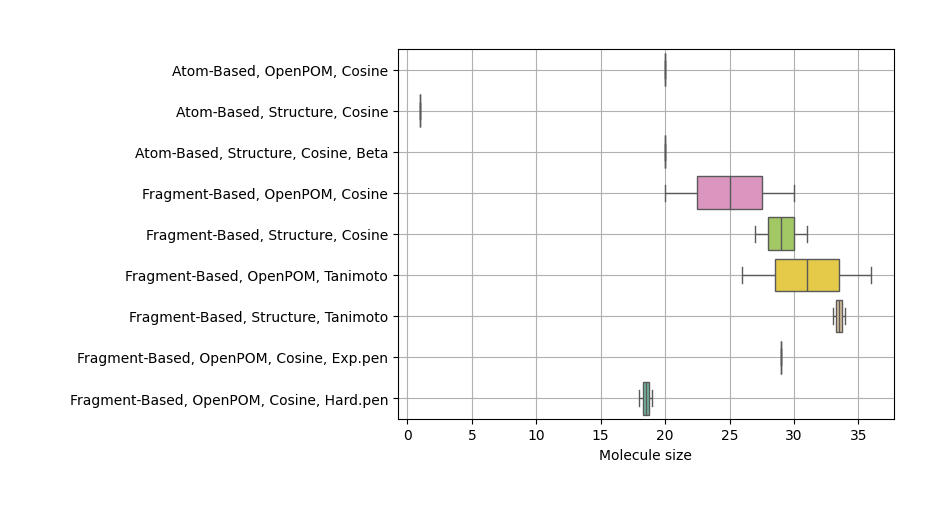

In [231]:

df = pd.DataFrame(
    columns=[" ","Molecule size"]
    )
df2 = pd.DataFrame(
    columns=[" ","Molecule size"]
    )
dflst = [df,df2]
ytickslst=[[],[]]
yticks = []
index=-1
for name in vanillalst:
    print(name)
    
    if name!="":
        savename = find_save(name)
        dflst[index] = stack_dfs(dflst[index], name, savename)
        ytickslst[index].append(vanillanames[name])
    else:
        index+=1
dflst
df=pd.concat(dflst)
sns.boxplot(x=df["Molecule size"], y=df[" "], palette='Set2')
y_ticks = plt.yticks()[0]  # Get current y-tick positions
plt.yticks(ticks=y_ticks, labels=['Atom-Based, '+i for i in ytickslst[0]]+['Fragment-Based, '+i for i in ytickslst[1]])

# Manually add subheadings for the ranges
#plt.text(0.1, 0, 'Atom-Based', fontsize=12, color='black', va='center', ha='right', fontweight='bold')
#plt.text(1.9, 2, 'Fragment-Based', fontsize=12, color='black', va='center', ha='right', fontweight='bold')
#plt.axhline(y=1.5, color='gray', linestyle='-', linewidth=1)
plt.grid()
plt.savefig("../images/vanillabox.pdf",bbox_inches="tight")



pine1
pine2


C:\Users\paulj\AppData\Local\Temp\ipykernel_11188\2551454043.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Molecule size"], y=df[" "], palette='Set2')


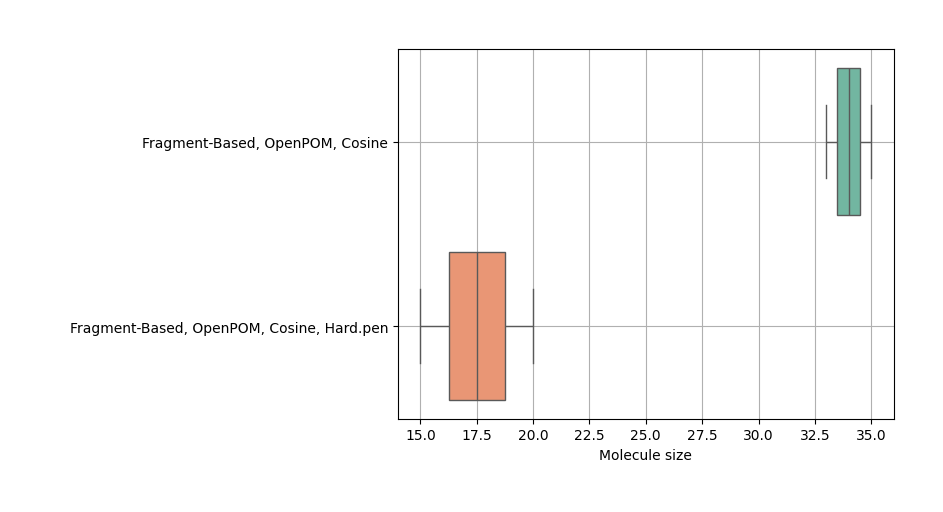

In [232]:
df = pd.DataFrame(
    columns=[" ","Molecule size"]
    )



yticks = []
index=-1
for name in pinelst:
    print(name)
    
    if name!="":
        savename = find_save_pine(name)
        df = stack_dfs(df, name, savename)
        yticks.append(pinenames[name])
    else:
        index+=1
df
sns.boxplot(x=df["Molecule size"], y=df[" "], palette='Set2')
y_ticks = plt.yticks()[0]  # Get current y-tick positions
plt.yticks(ticks=y_ticks, labels=['Fragment-Based, '+i for i in yticks])

# Manually add subheadings for the ranges
#plt.text(0.1, 0, 'Atom-Based', fontsize=12, color='black', va='center', ha='right', fontweight='bold')
#plt.text(1.9, 2, 'Fragment-Based', fontsize=12, color='black', va='center', ha='right', fontweight='bold')
#plt.axhline(y=1.5, color='gray', linestyle='-', linewidth=1)
plt.grid()
plt.savefig("../images/pinebox.pdf",bbox_inches="tight")